###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2019 Lorena A. Barba, Tingyu Wang; Edited by Bong-Sik Kim ([Original File](https://nbviewer.jupyter.org/github/engineersCode/EngComp4_landlinear/blob/master/notebook_en/01_Transform_all_the_Vectors.ipynb))

# Vector Spaces
We take a visual and intuitive approach to illuminate some of the core ideas in Multivariable Calculus, enabled by computing. 

Whether you missed out on taking a college linear algebra course, or you did so a long time ago and need a refresher, this learning module can be your launching pad to the wonderful world of _vector spaces_.

Let's get started! We will be using our favorite libraries of the Python ecosystem: `NumPy` and `Matplotlib`. We also have a few helper functions in the `plot_helper.py` script, which will make it easy to visualize the ideas in these lessons. 
Go ahead and load these by executing the next two cells.

In [2]:
import numpy as np 
%matplotlib inline

import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append('./utilities/')

# Our helper, with the functions: 
# plot_vector, plot_linear_transformation, plot_linear_transformations
from plot_helper import *

## Vectors

### What's a vector?

Vectors are everywhere: physics, engineering, mathematics, computer science, video games, and more. Each field's interpretation of what a vector *is* may be different, but  vectors live a similar life in every space.

The first episode in the wonderful video series, [_"Essence of Linear Algebra"_](http://3b1b.co/eola) tells you of three different ideas about vectors [1]:

1. For physicists, a vector is an "arrow" of a given length (magnitude) and direction. It can represent directional quantities like velocity, force, acceleration.
2. For computer scientists, a vector is an ordered list of numbers. It can represent a set of variables or features stored in order.
3. For mathematicians, vectors are generic objects that behave a certain way when they are added or scaled:  $\mathbf{u}+\mathbf{v}$, $\alpha\mathbf{v}$.

<img src="./images/whatsavector.png" style="width: 500px;"/> 
#### How you think of a vector depends on who you are...

In physics, vectors are almost always two- or three-dimensional (although in some fancy branches of physics they do go to higher dimensions). Vectors help physicists describe things like motion and electro-magnetic fields on a plane or in physical 3D space.

In computer science and in data science, vectors are often multi-dimensional, that is, they have many components. They contain a set of ordered variables in a data model, like for example: the age, weight, daily hours of sleep, weekly hours of exercise, and blood pressure of an individual (five dimensions).

### Visualizing vectors

Let's start with the idea of a vector as an "arrow" (magnitude plus direction). We visualize a vector by placing this arrow with its tail at the origin of a coordinate system.
But changing the position of the tail doesn't change the vector's magnitude or direction, so the vector is the same no matter where we draw it. 

In the code cell below, we define a list with a single vector of **coordinates** $(2, 2)$, and we use our custom function `plot_vector()` to plot the vector with its tail at four different positions on a 2D coordinate system. 

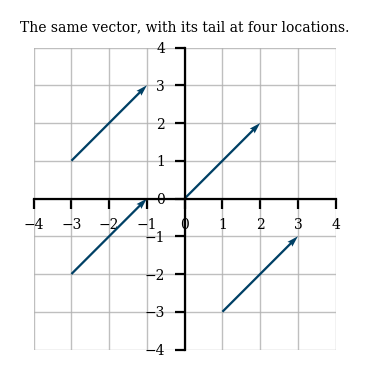

In [4]:
vectors = [(2,2)]
tails = [(-3,-2), (-3,1), (0,0), (1,-3)]
plot_vector(vectors, tails)
plt.title("The same vector, with its tail at four locations.");

In the 2D plane, we can see clearly the connection between the "arrow" idea of vector, and the "list of numbers," which in this case represents the coordinates of the arrow head when the tail is at the origin of the coordinate system.

The **first coordinate** designates the horizontal distance between head and tail, and the **second coordinate** designates the vertical distance between head and tail. We typically will denote horizontal and vertical axes as $x$ and $y$.

In three dimensions, $x$ and $y$ are usually denoting the perpendicular axes on the horizontal plane, and the vertical axis is denoted by $z$. A 3D vector thus has three components: $(x, y, z)$.

##### Note:

Our helper function `plot_vector()` takes one or two lists as arguments: a list of vectors, and a list of tails (optional). It can plot one vector with its tail on several locations, or several vectors with their tail at one location. It can also plot several vectors with their tails at different locations, but in that case, the two lists have to match in length (if they don't, the function will give an error).

##### **Exercise 1:**

In a new code cell, create a list of vectors (either as tuples of coordinates, or as NumPy arrays), and plot them. The default tail position is the origin. Then create a list of tail positions, and plot the same vectors again at these positions.

### Fundamental vector operations

Two operations are the foundation of everything: **vector addition**, and **multiplication by a scalar** (i.e., scaling).

Let's first visualize vector addition. Suppose we have two vectors: 

$$
   \mathbf{a} = \left[ \begin{array}{c} -2 \\ 1  \end{array} \right], \quad  
   \mathbf{b} = \left[ \begin{array}{c} 1 \\ -3  \end{array} \right] 
$$

We can visualize vector addition as follows: draw vector $\mathbf{a}$ with its tail at the origin; then draw vector $\mathbf{b}$ with its tail on the head of $\mathbf{a}$. If you now draw a vector from the origin to the head of $\mathbf{b}$, that vector is $\mathbf{a} + \mathbf{b}$.

With our helper function for plotting 2D vectors, it looks like this:

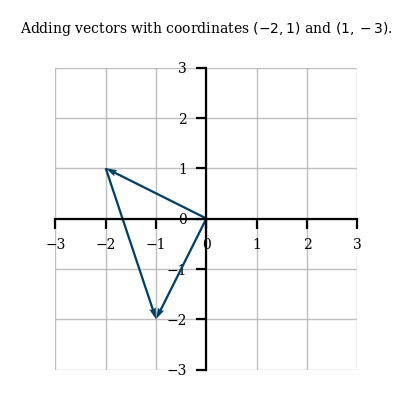

In [5]:
# vector addition
a = np.array((-2,1))
b = np.array((1,-3))
origin = np.array((0,0))

vectors = [a, b, a+b]
tails   = [origin, a, origin]
plot_vector(vectors, tails)
pyplot.title("Adding vectors with coordinates $(-2, 1)$ and $(1,-3)$.\n");

In this visualization of vector addition, the head of $\mathbf{a} + \mathbf{b}$ ends up at the coordinates  resulting from adding the tail-to-head horizontal and vertical distances of $\mathbf{a}$ and $\mathbf{b}$. In other words, from adding the respective coordinates:

$$
   \left[ \begin{array}{c} -2 \\ 1  \end{array} \right] +  
   \left[ \begin{array}{c} 1 \\ -3  \end{array} \right] =
   \left[ \begin{array}{c} -2+1 \\ 1-3  \end{array} \right]
$$


Let's now look at multiplication by a scalar: essentially, the length of the vector is *scaled* by the scalar factor. If you multiply a vector by $2$, its length (magnitude) doubles. 

For example, if we scale by $2$ the vector $\mathbf{c} = \left[ \begin{array}{c} 2 \\ 1  \end{array} \right]$, it looks like this:

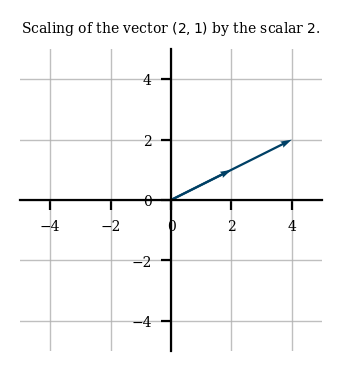

In [6]:
# vector scaling
c = np.array((2,1))
vectors = [c, 2*c]
plot_vector(vectors)
plt.title("Scaling of the vector $(2,1)$ by the scalar $2$.");

The head of the vector $2\mathbf{c}$ ends up at the coordinates resulting from scaling the tail-to-head horizontal and vertical distances of $\mathbf{c}$:

$$
  2\cdot\left[ \begin{array}{c} 2 \\ 1  \end{array} \right] =
  \left[ \begin{array}{c} 2\cdot 2 \\ 2\cdot 1  \end{array} \right]
$$

##### **Exercise 2:**

_What is the effect of multiplying a vector by a negative scalar?_ Try it! Multiply the vector $\mathbf{c}$ by a negative scalar and visualize both vectors using our `plot_vector()` function.

### Standard unit vectors (= Basis vectors)

The vectors of length $1$ are called **unit vectors**. With the ideas of vector addition and multiplication by a scalar, any horizontal vector (i.e., having zero as its second component) can be scaled to a unit vector. 

For example, the vector $\,\mathbf{u} = \left[ \begin{array}{c} u \\ 0  \end{array} \right]$ scaled by $1/u$ becomes $\left[ \begin{array}{c} 1 \\ 0  \end{array} \right]$.

Similarly, any vertical vector (having zero as its first component) can be scaled to have length $1$.

Going the opposite way, 
- scaling the vector $\,\mathbf{i}=\left[ \begin{array}{c} 1 \\ 0  \end{array} \right]$ can give us all possible horizontal vectors, and 
- scaling the vector $\,\mathbf{j}=\left[ \begin{array}{c} 0 \\ 1  \end{array} \right]$ can give us all possible vertical vectors. 

Since every vector is the sum of a horizontal and a vertical one, it means we can generate *all vectors* by adding scaled versions of $\mathbf{i}$ and $\mathbf{j}$. That's why they are called **standard unit vectors** (or **basis vectors**).

For any vector, its components are the scalars we need to multiply the basis vectors by to generate it. For example:

$$
 \left[ \begin{array}{c} 3 \\ 2  \end{array} \right] =
 3\cdot\left[ \begin{array}{c} 1 \\ 0  \end{array} \right] +
 2\cdot\left[ \begin{array}{c} 0 \\ 1  \end{array} \right] =
 3\,\mathbf{i} + 2\,\mathbf{j}
$$

Let's visualize this using our helper function.

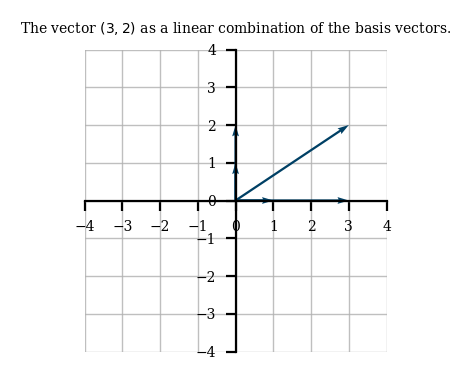

In [7]:
# basis vector
i = numpy.array((1,0))
j = numpy.array((0,1))

vec = 3*i + 2*j
vectors = [i, j, 3*i, 2*j, vec]
plot_vector(vectors)
pyplot.title("The vector $(3,2)$ as a linear combination of the basis vectors.");

### Linear combination and span

Adding two vectors that were each multiplied by a scalar is called a **linear combination** of those two vectors. 
For example, $2\mathbf{a}+0.5\mathbf{b}$, $(-3)\mathbf{a}+8\mathbf{b}$, etc.
Thus, we say that every vector is some linear combination of the basis vectors.

This brings us to the idea of the **span** of two vectors: the set of all possible linear combinations of the two. The second episode of the series [_"Essence of Linear Algebra"_](http://3b1b.co/eola) uses rich visuals to bring these ideas to life [2]. Recommended!


In the code cells below, we will use the NumPy function [`randint`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.randint.html) to get random integers in an interval (in this case, from $-10$ to $10$). We then create a list of 30 random vectors on the plane via a linear combination of the basis vectors $\mathbf{i}$ and $\mathbf{j}$, and we draw them all.  

In [8]:
from numpy.random import randint

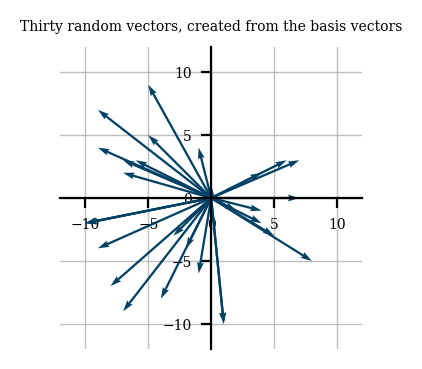

In [9]:
# span
vectors = []
i = np.array((1,0))
j = np.array((0,1))

for _ in range(30):
    m = randint(-10,10)
    n = randint(-10,10)
    vectors.append(m*i + n*j)
    
plot_vector(vectors)
plt.title("Thirty random vectors, created from the basis vectors");

You can imagine that if we created more and more random vectors in this way, eventually we will fill up the 2D plane. Indeed, the **span** of the basis vectors is the whole 2D space. 

What if we tried the same experiment, but making linear combinations of the vectors $\mathbf{a}$ and $\mathbf{b}$, defined above?

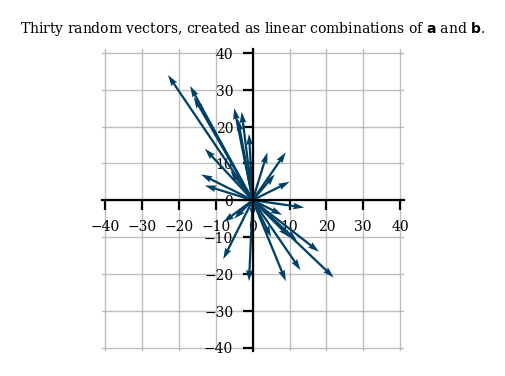

In [10]:
vectors = []
for _ in range(30):
    m = randint(-10,10)
    n = randint(-10,10)
    vectors.append(m*a + n*b)
    
plot_vector(vectors)
plt.title("Thirty random vectors, created as linear combinations of $\mathbf{a}$ and $\mathbf{b}$.");

In fact, we can *still* fill up the whole plane with infinite linear combinations of $\mathbf{a}$ and $\mathbf{b}$—they span the full 2D space. We're not forced to use the unit vectors $\mathbf{i}$ and $\mathbf{j}$ as our basis vectors: other pairs of vectors could form a basis. With $\mathbf{i}$ and $\mathbf{j}$, we saw that the components of a vector $\mathbf{v}$ are the scalars needed in its corresponding linear combination of the basis vectors. If we were to use another pair of vectors as basis, we would need a different pair of scalars in the linear combination to get the same vector: we are _changing the coordinate system_.

Let's see another situation... we'll make linear combinations of the vector $\mathbf{a}$, and a new vector, $\mathbf{d} = \left[ \begin{array}{c} -1 \\ 0.5  \end{array} \right]$,

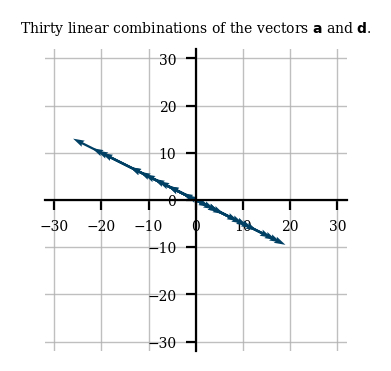

In [11]:
d = np.array((-1,0.5))
vectors = []
for _ in range(30):
    m = randint(-10,10)
    n = randint(-10,10)
    vectors.append(m*a + n*d)
    
plot_vector(vectors)
plt.title("Thirty linear combinations of the vectors $\mathbf{a}$ and $\mathbf{d}$.");

*What's going on?*

Well, the new vector $\mathbf{d}$ happens to be a scaled version of the original vector $\mathbf{a}$—we say that they are _colinear_. Thus, all linear combinations of $\mathbf{a}$ and $\mathbf{d}$ end up on one line, which is their span. Their combinations are not able to travel all over the plane!

##### Definition:

> A **basis** for a vector space is a set of _linearly independent_ vectors that _span_ that space.

We saw above that $\mathbf{d}$ is a scalar multiplied by $\mathbf{a}$: it is linearly _dependent_ with $\mathbf{a}$. The vector $\mathbf{b}$, however, is linearly independent with $\mathbf{a}$. Bring in vector $\mathbf{c}$ now: it can be written as a linear combination of $\mathbf{a}$ and $\mathbf{b}$: $\alpha\, \mathbf{a} + \beta\, \mathbf{b} = \mathbf{c}$, for some scalars $\alpha$ and $\beta$. In 2D space, any third vector will be linearly dependent with $\mathbf{a}$ and $\mathbf{b}$: these two form a _full set_ of independent vectors (and a basis).

In 3D space, two vectors that are linearly independent span a plane. We need a third vector that is not a linear combination of the first two to span the whole space, and form a basis. Any fourth vector will be linearly dependent as it can be written as a linear combination of the basis vectors.

##### Key idea:

> In a set of linearly independent vectors, no one vector can be written as a linear combination of the others. The only way to get the zero vector from a linear combination of all the vectors is to multiply them all by zero.

**Note**: Plotting 30 vectors can result in a messy figure. When we want to visualize many vectors like this, we can simplify the plot by only showing the tip (head) of the vector, as a point on the plane. We'll do that from now on.

## What we've learned

- What is a vector.
- The two fundamental vector operations: vector addition and scaling.
- The concept of basis vectors.
- Making a linear combination of vectors; the concept of span.

## References

1. Vectors, what even are they? Essence of linear algebra, chapter 1. Video at https://youtu.be/fNk_zzaMoSs (2016), by Grant Sanderson.
2. Linear combinations, span, and basis vectors. Essence of linear algebra, chapter 2. Video at https://youtu.be/k7RM-ot2NWY (2016), by Grant Sanderson.

In [1]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = './style/custom.css'
HTML(open(css_file, "r").read())